Potential Other Questions: Can we determine position type based on weight or other statistics?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib2
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns

In [19]:
#All active players don't have "years played" information -> set values to "Active"
#All retired players don't have "current team" information -> set values to "Retired"
#All retired players don't have "Position" information -> set values to "TBD"
    #These positions will have to be updated based on crossreferencing with the other .csv statistics files
Basic_Stats = pd.read_csv("./Basic_Stats.csv");
Basic_Stats = pd.DataFrame(data = Basic_Stats)
Basic_Stats['Current Team'].replace(np.nan,'Retired', inplace=True);
Basic_Stats['Years Played'].replace(np.nan,'Active', inplace=True);
Basic_Stats['Position'].replace(np.nan,0, inplace=True);

#Assign positions to numerical values
Basic_Stats['Position'].replace(['QB'],1, inplace=True);
Basic_Stats['Position'].replace(['RB'],2, inplace=True);
Basic_Stats['Position'].replace(['FB'],3, inplace=True);
Basic_Stats['Position'].replace(['WR'],4, inplace=True);
Basic_Stats['Position'].replace(['TE'],5, inplace=True);
Basic_Stats['Position'].replace(['OL','OG','G','C','T','OT'],6, inplace=True);
Basic_Stats['Position'].replace(['DE','DT','NT','DL'],7, inplace=True);
Basic_Stats['Position'].replace(['OLB', 'ILB','LB','MLB'],8, inplace=True);
Basic_Stats['Position'].replace(['SS','FS','SAF','LS'],9, inplace=True);
Basic_Stats['Position'].replace(['CB','DB'],10, inplace=True);
Basic_Stats['Position'].replace(['K','P'],11, inplace=True);


#Delete sparse data 
Basic_Stats = Basic_Stats.drop(['Number'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School'], axis=1)
Basic_Stats = Basic_Stats.drop(['High School Location'], axis=1)
Basic_Stats = Basic_Stats.drop(['Age'], axis=1)
Basic_Stats = Basic_Stats.dropna(axis = 0, how="any")

#Turn experience column into int64 data type by removing "Seasons"
Basic_Stats['Experience'] = pd.Series(Basic_Stats['Experience']).str.replace(' Seasons', '')
Basic_Stats['Experience'] = pd.to_numeric(Basic_Stats['Experience'])
print Basic_Stats.info(), "\n\n"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14720 entries, 0 to 17171
Data columns (total 12 columns):
Birth Place        14720 non-null object
Birthday           14720 non-null object
College            14720 non-null object
Current Status     14720 non-null object
Current Team       14720 non-null object
Experience         14720 non-null int64
Height (inches)    14720 non-null float64
Name               14720 non-null object
Player Id          14720 non-null object
Position           14720 non-null int64
Weight (lbs)       14720 non-null float64
Years Played       14720 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB
None 




Correlations:
                   Experience  Height (inches)  Position  Weight (lbs)
Experience         1.000000         0.131297  0.006212      0.137117
Height (inches)    0.131297         1.000000  0.073208      0.708869
Position           0.006212         0.073208  1.000000      0.147453
Weight (lbs)       0.137117         0.708869  0.147453      1.000000 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14720 entries, 0 to 17171
Data columns (total 12 columns):
Birth Place        14720 non-null object
Birthday           14720 non-null object
College            14720 non-null object
Current Status     14720 non-null object
Current Team       14720 non-null object
Experience         14720 non-null int64
Height (inches)    14720 non-null float64
Name               14720 non-null object
Player Id          14720 non-null object
Position           14720 non-null int64
Weight (lbs)       14720 non-null float64
Years Played       14720 non-null object
dtypes: float64(2), int64(2), objec

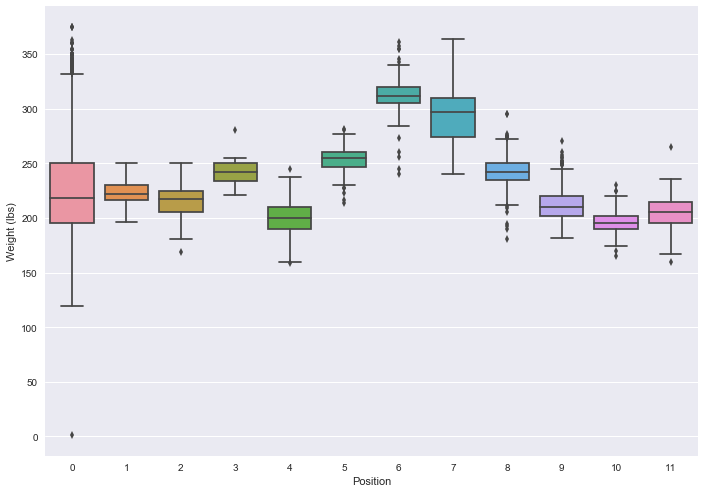

In [20]:
#################
##  TODO: Need to find way to correlate discrete data objects
#################
print "Correlations:\n ",Basic_Stats.corr(method='pearson'), "\n\n"

#Box plot of Weight ranges for each position
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Position", y="Weight (lbs)", data=Basic_Stats);

print Basic_Stats.info(), "\n\n"